需要用anaconda环境

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt



Bad key "text.kerning_factor" on line 4 in
d:\programs\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [ ]:

# Load the dataset
df = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_accessibility_remove_outliers.csv")

# Perform one-hot encoding on the categorical variables
df_encoded = pd.get_dummies(df, columns=['property_type', 'borough'])

# Define predictors and target variable
X = df_encoded.drop(['price', 'address', 'lat', 'lon', 'Price_per_square_meter', 'id','Unnamed: 0'], axis=1)
y = df_encoded['Price_per_square_meter']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


from tensorflow.keras import backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))



# Define the model
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[r_squared])

# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32)



In [17]:
X_train

,bedrooms,bathrooms,size_square_meters,AccommodationAccess15m,AirportsAccess15m,Culture and tourismAccess15m,Eating and drinkingAccess15m,EducationAccess15m,EntertainmentAccess15m,HealthAccess15m,...,borough_Merton,borough_Newham,borough_Redbridge,borough_Richmond upon Thames,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth,borough_Westminster
2704,4.0,2.0,116.0,0.0,0.0,7.0,147.0,20.0,14.0,36.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
871,2.0,1.0,88.0,1.0,0.0,5.0,35.0,7.0,3.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
736,5.0,3.0,159.0,2.0,0.0,4.0,98.0,7.0,13.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3742,4.0,2.0,144.0,1.0,0.0,29.0,300.0,34.0,42.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1728,2.0,2.0,64.0,10.0,0.0,16.0,409.0,70.0,53.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2.0,2.0,73.0,1.0,0.0,20.0,145.0,23.0,20.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,5.0,5.0,390.0,3.0,0.0,6.0,78.0,18.0,15.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,4.0,1.0,84.0,4.0,0.0,8.0,191.0,23.0,17.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3507,4.0,2.0,131.0,0.0,0.0,4.0,6.0,4.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
# Predicting results
y_pred = model.predict(X_test)

# Getting model weights
weights = model.get_weights()

# Getting weights of each layer
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    #print(weights)
# Print model summary
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                3900      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,951
Trainable params: 3,951
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('R²: %.2f' %(scores[1]*100))


R²: 23.64


In [32]:
import paddle
import numpy as np
from sklearn.model_selection import train_test_split

class MyDNN(paddle.nn.Layer):
    def __init__(self):
        super(MyDNN, self).__init__()

        self.linear1 = paddle.nn.Linear(76, 32)
        self.linear2 = paddle.nn.Linear(32, 64)
        self.linear3 = paddle.nn.Linear(64, 32)
        self.linear4 = paddle.nn.Linear(32, 1)
        
    def forward(self, inputs): 
        x = self.linear1(inputs)
        x = self.linear2(x)
        x = self.linear3(x)
        x = self.linear4(x)
        return x

class MyDataset(paddle.io.Dataset):
    def __init__(self, features, labels):
        super(MyDataset, self).__init__()
        self.features = features
        self.labels = labels

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

    def __len__(self):
        return len(self.labels)

# Convert DataFrame to numpy arrays
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

# Split your data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Dataset
train_dataset = MyDataset(X_train, y_train)
eval_dataset = MyDataset(X_test, y_test)

# Create DataLoader
train_loader = paddle.io.DataLoader(train_dataset, batch_size=32, shuffle=True)
eval_loader = paddle.io.DataLoader(eval_dataset, batch_size=8, shuffle=False)

# Instantiate the model
model = MyDNN()
model.train()

# Loss and optimizer
mse_loss = paddle.nn.MSELoss()
opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters(), 
                           grad_clip=paddle.nn.ClipGradByNorm(clip_norm=1.0))

epochs_num = 100

for epochs in range(epochs_num):
    for batch_id, data in enumerate(train_loader()):
        feature = paddle.to_tensor(data[0])
        label = paddle.to_tensor(data[1])
        predict = model(feature)
        loss = mse_loss(predict, label)
        loss.backward()
        opt.step()
        opt.clear_grad()
        if batch_id!=0 and batch_id%10 == 0:
            print(f"epoch {epochs}, step {batch_id}, train_loss {loss.numpy()[0]}")

# Save model
paddle.save(model.state_dict(), "UCIHousingDNN.pdparams")

# Load model for evaluation
state_dict = paddle.load("UCIHousingDNN.pdparams")
model = MyDNN()
model.load_dict(state_dict)
model.eval()

# Evaluate the model
losses = []
for batch_id, data in enumerate(eval_loader()):
    feature = paddle.to_tensor(data[0])
    label = paddle.to_tensor(data[1])
    predict = model(feature)
    loss = mse_loss(predict, label)
    losses.append(loss.numpy()[0])

avg_loss = np.mean(losses)
print(f"average loss: {avg_loss}")


epoch 0, step 10, train_loss 141497200.0
epoch 0, step 20, train_loss 132319368.0
epoch 0, step 30, train_loss 124818640.0
epoch 0, step 40, train_loss 113699944.0
epoch 0, step 50, train_loss 175321488.0
epoch 0, step 60, train_loss 122451264.0
epoch 0, step 70, train_loss 120367616.0
epoch 0, step 80, train_loss 133153216.0
epoch 0, step 90, train_loss 128772776.0
epoch 1, step 10, train_loss 136945392.0
epoch 1, step 20, train_loss 96902656.0
epoch 1, step 30, train_loss 135402496.0
epoch 1, step 40, train_loss 148750656.0
epoch 1, step 50, train_loss 96881096.0
epoch 1, step 60, train_loss 96404256.0
epoch 1, step 70, train_loss 89924688.0
epoch 1, step 80, train_loss 159725920.0
epoch 1, step 90, train_loss 104211480.0
epoch 2, step 10, train_loss 115342872.0
epoch 2, step 20, train_loss 86894336.0
epoch 2, step 30, train_loss 154068416.0
epoch 2, step 40, train_loss 101102952.0
epoch 2, step 50, train_loss 102629760.0
epoch 2, step 60, train_loss 104421848.0
epoch 2, step 70, tra

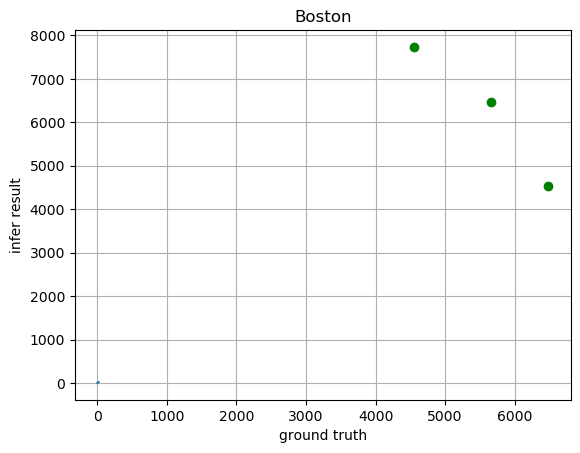

In [33]:
def draw_infer_result(groud_truths, infer_results):
    title = 'Boston'
    plt.title(title)
    x = np.arange(1,20)
    y = x
    plt.plot(x,y);
    plt.xlabel("ground truth")
    plt.ylabel("infer result")
    plt.scatter(groud_truths,infer_results,color='green',label='training cost')
    plt.grid()
    plt.show()

draw_infer_result(label,predict)

In [35]:
from sklearn.metrics import r2_score

predictions = []
labels = []

# Predict and gather true y and predicted y
for batch_id, data in enumerate(eval_loader()):
    feature = data[0]
    label = data[1]
    predict = model(feature)

    predictions.extend(predict.flatten().numpy())
    labels.extend(label.flatten().numpy())

# Calculate R2 Score
r2 = r2_score(labels, predictions)

print(f"R2 Score: {r2}")


R2 Score: -0.1921376038716971
